# Aprendizaje supervisado



El aprendizaje supervisado trata de encontrar valores para variables independientes a partir de variables dependientes. Esto parte del supuesto de que, entre las variables hay relaciones que permiten explicarlas. 

El aprendizaje supervisado suele subdividirse en 
- Aprendizaje semisupervisado
- *Active learning*
- Aprendizaje por refuerzo
- Aprendizaje profundo

## Paquetes

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

## Regresión lineal

En una regresión se busca ajustar una curva a los datos minimizando el error. La regresión más sencilla es la regresión lineal donde se pretende predecir valores $Y$ a partir de determinados $n$ variables $X$ mediante la ecuación lineal $Y = b_0 + X_1 \cdot b_1 + \ldots + X_n \cdot b_n$, donde $b_0$ coincide con una constante o intercepción, mientras que $b_i, i \in \{1, \ldots, n\}$ son la pendiente para cada $X$.

Para este ejemplo se quieren predecir los valores faltantes a partir de los presentes. O sea, la interpolación espaciotemporal de la que se habló al inicio del curso.

In [39]:
df = pd.read_csv('../data/results/df_sel.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636,WD,82.0
5124401,2019-12-31 20:00:00,25.665,-100.413,636,WD,87.0
5124402,2019-12-31 21:00:00,25.665,-100.413,636,WD,98.0
5124403,2019-12-31 22:00:00,25.665,-100.413,636,WD,104.0


In [40]:
df_sel = df.copy()
df_sel.timestamp = df_sel.timestamp.values.astype(np.int64) / 10 ** 9
df_sel = pd.concat([df_sel, pd.get_dummies(df_sel.variable)], axis=1)
df_sel = df_sel.drop(columns= ['variable'])
df_sel

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,1.483229e+09,25.670,-100.338,560,143.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1.483232e+09,25.670,-100.338,560,183.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.483236e+09,25.670,-100.338,560,142.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.483240e+09,25.670,-100.338,560,101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.483243e+09,25.670,-100.338,560,85.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,1.577819e+09,25.665,-100.413,636,82.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124401,1.577822e+09,25.665,-100.413,636,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124402,1.577826e+09,25.665,-100.413,636,98.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124403,1.577830e+09,25.665,-100.413,636,104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
scaler = MinMaxScaler()
# https://stackoverflow.com/a/43383700
scaled = scaler.fit_transform(df_sel)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
df_scaled = pd.DataFrame(scaled, columns = df_sel.columns)
df_scaled

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,0.000000,0.704545,0.419983,0.585106,0.193371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000038,0.704545,0.419983,0.585106,0.240651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000076,0.704545,0.419983,0.585106,0.192189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000114,0.704545,0.419983,0.585106,0.143728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000152,0.704545,0.419983,0.585106,0.124817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,0.999848,0.693182,0.292972,0.787234,0.121271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,0.999886,0.693182,0.292972,0.787234,0.127181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,0.999924,0.693182,0.292972,0.787234,0.140182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,0.999962,0.693182,0.292972,0.787234,0.147274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df_dropna = df_scaled.dropna()
df_dropna

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,0.000000,0.704545,0.419983,0.585106,0.193371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000038,0.704545,0.419983,0.585106,0.240651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000076,0.704545,0.419983,0.585106,0.192189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000114,0.704545,0.419983,0.585106,0.143728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000152,0.704545,0.419983,0.585106,0.124817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,0.999848,0.693182,0.292972,0.787234,0.121271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,0.999886,0.693182,0.292972,0.787234,0.127181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,0.999924,0.693182,0.292972,0.787234,0.140182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,0.999962,0.693182,0.292972,0.787234,0.147274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_train = df_dropna.sample(frac = 0.7)
x_train = df_train[['timestamp', 'lat', 'lon', 'h', 'BP','CO','NO','NO2','NOX','O3','PM10','PM2_5','RF','RH','SO2','SR','T','WD','WV']]
y_train = df_train[['value']]

In [6]:
df_test = df_dropna.drop(df_train.index)

x_test = df_test[['timestamp', 'lat', 'lon', 'h', 'BP','CO','NO','NO2','NOX','O3','PM10','PM2_5','RF','RH','SO2','SR','T','WD','WV']]
y_test = df_test[['value']]

Casi todos los algoritmos de aprendizaje supervisado tienen una misma metodología de aplicación:
1. Se separan las variables en dependientes ($X$) e independientes ($Y$),
2. se separan los datos en conjuntos de entrenamiento (generalmente $70\%$ de los datos) y prueba (el $30\%$ restante),
3. se entrena un algoritmo a partir de los datos de entrenamiento,
4. se produce una predicción sobre los datos de prueba, y
5. se utiliza alguna métrica de error para conocer la exactitud del modelo.

Primero, se hace un ejemplo con una regresión lineal. Luego, se puede aplicar este algoritmo con los métodos más adecuados o de manera exhaustiva. 

In [73]:
# Paquete del modelo
from sklearn import linear_model

In [74]:
# Creación del objeto del modelo
model = linear_model.LinearRegression()

In [75]:
# Entrenamiento y ajuste del modelo
model.fit(x_train, y_train)

LinearRegression()

In [76]:
# Los atributos intercept y coev devuelven los valores de b; lo que devuelve la ecuación del modelo para explicar Y
print(f'y = {round(model.intercept_[0], 4)}', end = ' ')
for i in range(len(model.coef_[0])):
    print(f'+ X_{i} ({round(model.coef_[0][i], 4)})', end = ' ')

y = 80394703.9571 + X_0 (-0.0026) + X_1 (0.0064) + X_2 (0.0195) + X_3 (0.0095) + X_4 (-80394703.1066) + X_5 (-80394703.949) + X_6 (-80394703.9286) + X_7 (-80394703.9353) + X_8 (-80394703.9139) + X_9 (-80394703.9211) + X_10 (-80394703.8805) + X_11 (-80394703.9251) + X_12 (-80394703.9506) + X_13 (-80394703.8779) + X_14 (-80394703.9418) + X_15 (-80394703.9503) + X_16 (-80394703.9237) + X_17 (-80394703.7873) + X_18 (-80394703.942) 

In [77]:
# Se predice a partir de los valores de prueba
y_pred = model.predict(x_test)
y_pred

array([[0.09478745],
       [0.09478736],
       [0.09478696],
       ...,
       [0.18473519],
       [0.18473442],
       [0.18473431]])

In [78]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [79]:
# Se usa una métrica de error adecuada (MAPE calcula el porcentaje del error cuadrado medio)
mape(y_pred, y_test)

0.19207406944416316

Ya con esto, se podría hacer predicción de los valores faltantes mediante

In [80]:
# Se toman los valores faltantes y se separan las variables independientes
df_na = df_scaled[df_scaled.value.isna()]
x_na = df_na[['timestamp', 'lat', 'lon', 'h', 'BP','CO','NO','NO2','NOX','O3','PM10','PM2_5','RF','RH','SO2','SR','T','WD','WV']]
x_na

,timestamp,lat,lon,h,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
219,0.008334,0.704545,0.419983,0.585106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.008828,0.704545,0.419983,0.585106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.009704,0.704545,0.419983,0.585106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0.011188,0.704545,0.419983,0.585106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.015944,0.704545,0.419983,0.585106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123984,0.984018,0.693182,0.292972,0.787234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5123987,0.984132,0.693182,0.292972,0.787234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124083,0.987785,0.693182,0.292972,0.787234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124254,0.994292,0.693182,0.292972,0.787234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# Se calcula la variable dependiente
y_pred_na = model.predict(x_na)
y_pred_na

array([[0.09476598],
       [0.09476471],
       [0.09476246],
       ...,
       [0.18476579],
       [0.18474902],
       [0.18473656]])

In [82]:
# Se reintegra en el conjunto de datos
df_na.value = y_pred_na
df_inter = df_scaled.copy()
df_inter.loc[df_na.index, 'value'] = df_na.value
df_inter

C:\Users\user\AppData\Local\Temp\ipykernel_22404\194015901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na.value = y_pred_na


,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,0.000000,0.704545,0.419983,0.585106,0.193371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000038,0.704545,0.419983,0.585106,0.240651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000076,0.704545,0.419983,0.585106,0.192189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000114,0.704545,0.419983,0.585106,0.143728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000152,0.704545,0.419983,0.585106,0.124817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,0.999848,0.693182,0.292972,0.787234,0.121271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,0.999886,0.693182,0.292972,0.787234,0.127181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,0.999924,0.693182,0.292972,0.787234,0.140182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,0.999962,0.693182,0.292972,0.787234,0.147274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
# Se desescala el conjunto de datos, previamente escalado
descaled = scaler.inverse_transform(df_inter)
df_descaled = pd.DataFrame(descaled, columns = df_inter.columns, index = df_inter.index)
df_descaled

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,1.483229e+09,25.670,-100.338,560.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.483232e+09,25.670,-100.338,560.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.483236e+09,25.670,-100.338,560.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.483240e+09,25.670,-100.338,560.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.483243e+09,25.670,-100.338,560.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,1.577819e+09,25.665,-100.413,636.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,1.577822e+09,25.665,-100.413,636.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,1.577826e+09,25.665,-100.413,636.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,1.577830e+09,25.665,-100.413,636.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
# https://stackoverflow.com/a/61251205
# Se recupera el nombre de las variables obtenidas por el one-hot-encoder (para este caso específico)
variable_col = df_descaled.iloc[:, 5:].idxmax(axis=1)
variable_col

0          PM10
1          PM10
2          PM10
3          PM10
4          PM10
           ... 
5124400      WD
5124401      WD
5124402      WD
5124403      WD
5124404      WD
Length: 5124405, dtype: object

In [85]:
df

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636,WD,82.0
5124401,2019-12-31 20:00:00,25.665,-100.413,636,WD,87.0
5124402,2019-12-31 21:00:00,25.665,-100.413,636,WD,98.0
5124403,2019-12-31 22:00:00,25.665,-100.413,636,WD,104.0


In [86]:
df_final = pd.concat([df_descaled, variable_col], axis = 1).drop(columns = ['BP','CO','NO','NO2','NOX','O3','PM10','PM2_5','RF','RH','SO2','SR','T','WD','WV'])
df_final.columns = ['timestamp', 'lat', 'lon', 'h', 'value', 'variable']
df_final.timestamp = df.timestamp
df_final

,timestamp,lat,lon,h,value,variable
0,2017-01-01 00:00:00,25.670,-100.338,560.0,143.0,PM10
1,2017-01-01 01:00:00,25.670,-100.338,560.0,183.0,PM10
2,2017-01-01 02:00:00,25.670,-100.338,560.0,142.0,PM10
3,2017-01-01 03:00:00,25.670,-100.338,560.0,101.0,PM10
4,2017-01-01 04:00:00,25.670,-100.338,560.0,85.0,PM10
...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636.0,82.0,WD
5124401,2019-12-31 20:00:00,25.665,-100.413,636.0,87.0,WD
5124402,2019-12-31 21:00:00,25.665,-100.413,636.0,98.0,WD
5124403,2019-12-31 22:00:00,25.665,-100.413,636.0,104.0,WD


In [87]:
df_final['original'] = np.nan
df_final.loc[df_dropna.index, 'original'] = df_final.loc[df_dropna.index, 'value']
df_final['interpolated'] = np.nan
df_final.loc[df_na.index, 'interpolated'] = df_final.loc[df_na.index, 'value']
df_final

,timestamp,lat,lon,h,value,variable,original,interpolated
0,2017-01-01 00:00:00,25.670,-100.338,560.0,143.0,PM10,143.0,NaN
1,2017-01-01 01:00:00,25.670,-100.338,560.0,183.0,PM10,183.0,NaN
2,2017-01-01 02:00:00,25.670,-100.338,560.0,142.0,PM10,142.0,NaN
3,2017-01-01 03:00:00,25.670,-100.338,560.0,101.0,PM10,101.0,NaN
4,2017-01-01 04:00:00,25.670,-100.338,560.0,85.0,PM10,85.0,NaN
...,...,...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636.0,82.0,WD,82.0,NaN
5124401,2019-12-31 20:00:00,25.665,-100.413,636.0,87.0,WD,87.0,NaN
5124402,2019-12-31 21:00:00,25.665,-100.413,636.0,98.0,WD,98.0,NaN
5124403,2019-12-31 22:00:00,25.665,-100.413,636.0,104.0,WD,104.0,NaN


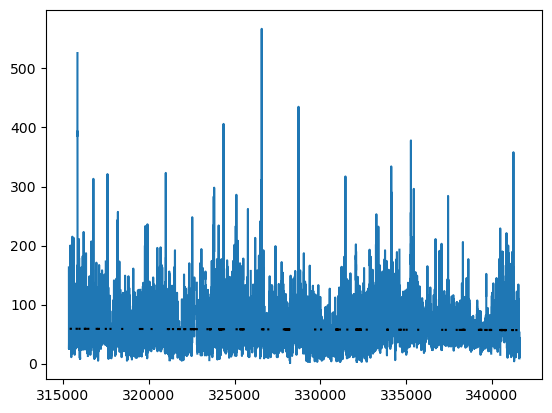

In [88]:
# Se representan los datos interpolados
t = df_final[(df_final.variable == 'PM10') & (df_final.lat == 25.665)]
plt.figure()
plt.plot(t.original)
plt.plot(t.interpolated, c = 'black')
plt.show()

¡Y ES HORRIBLE! 👻

Las líneas negras representan los valores predichos (interpolados, en este caso).

## Exhaustivo

Lo ideal es buscar literatura relacionada y encontrar los métodos más adecuados para nuestros conjuntos de datos porque (casi siempre) el mejor modelo *depende del conjunto de datos*. Sin embargo, por la premura de la clase, mostraré una función que me agrada para hacer esto de manera exhaustiva.

In [94]:
# Primero importamos un montón de modelos 🤯
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

In [95]:
# Luego, hacemos una función para recibir parámetros e hiperparámetros
def fit(x, y, reg_model = 'RF', n_components = 3, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth=2)
        case 'LassoReg':
            model = Lasso(alpha=0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            # https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha=0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'VotingEnsemble':
            # https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
            gb  = GradientBoostingRegressor()
            rf  = RandomForestRegressor(n_jobs = n_jobs)
            br  = BaggingRegressor(n_jobs = n_jobs)
            ab  = AdaBoostRegressor()
            gb.fit(x, y)
            rf.fit(x, y)
            br.fit(x, y)
            ab.fit(x, y)
            model = VotingRegressor([("gb",gb), ("rf",rf), ("br",br), ("ab",ab)], n_jobs = n_jobs)
        case 'VotingLinear':
            # https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
            pl = PLSRegression(n_components=n_components)
            lr = LinearRegression(n_jobs = n_jobs)
            ri = Ridge(alpha=0.1)
            la = Lasso(alpha=0.1)    
            pc = make_pipeline(PCA(n_components=n_components), LinearRegression(n_jobs = n_jobs))
            pl.fit(x, y)
            lr.fit(x, y)
            ri.fit(x, y)
            la.fit(x, y)
            pc.fit(x, y)
            model = VotingRegressor([("lr",lr),("ri",ri),("la",la),("pc",pc)], n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [100]:
# Esta librería es genial:
from tqdm import tqdm

# Además de ésta para los núcleos
import multiprocessing

# Ya que estamos, aprendamos a contar tiempos de ejecución
from timeit import default_timer as timer

In [102]:
try:
    #0 / 0 
    df_results_ed = pd.read_csv('../data/results/spatial_ml_results_ed.csv', index_col=0)
except:
    models_ed = ['Bagging', 'RF', 'LinearReg', 'BayesRidge', 'RidgeReg', 'PLS']
    n_jobs = multiprocessing.cpu_count() // 2
    results_ed = {
        'model' : [],
        'value' : [],
        'time' : []
    }
    for i in tqdm(range(30)):
        df_train = df_dropna.sample(frac = 0.7)
        x_train = df_train[['timestamp', 'lat', 'lon', 'h', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5', 'SO2', 'direction', 'humidity', 'pressure', 'rainfall', 'solar', 'temperature', 'velocity']]
        y_train = df_train[['value']]

        df_test = df_dropna.drop(df_train.index)
        x_test = df_test[['timestamp', 'lat', 'lon', 'h', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5', 'SO2', 'direction', 'humidity', 'pressure', 'rainfall', 'solar', 'temperature', 'velocity']]
        y_test = df_test[['value']]
        for m in models_ed:
            start = timer()
            model = fit(x_train, y_train.values.ravel(), m, n_jobs = n_jobs)
            end = timer()
            y_pred = model.predict(x_test)
            results_ed['model'].append(m)
            results_ed['value'].append(mape(y_test, y_pred))
            results_ed['time'].append(end - start)

        df_results_ed = pd.DataFrame(results_ed)
        df_results_ed = df_results_ed.sort_values('value')
        df_results_ed.to_csv('../data/results/spatial_ml_results_ed.csv')

In [103]:
# Posteriormente, se pueden ver los resultados
df_results_ed[:50]

,model,value,time
79,RF,0.060729,221.233260
139,RF,0.061057,218.984428
73,RF,0.061146,219.751986
25,RF,0.061155,220.547481
115,RF,0.061202,218.692525
127,RF,0.061266,220.210493
1,RF,0.061320,229.965411
61,RF,0.061345,219.671362
121,RF,0.061367,219.150942
133,RF,0.061394,217.826951


In [104]:
# Agruparlos por modelo
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('value')

In [108]:
# Paquete para más opciones gráficas
import seaborn as sns

import matplotlib.patches as mpatches

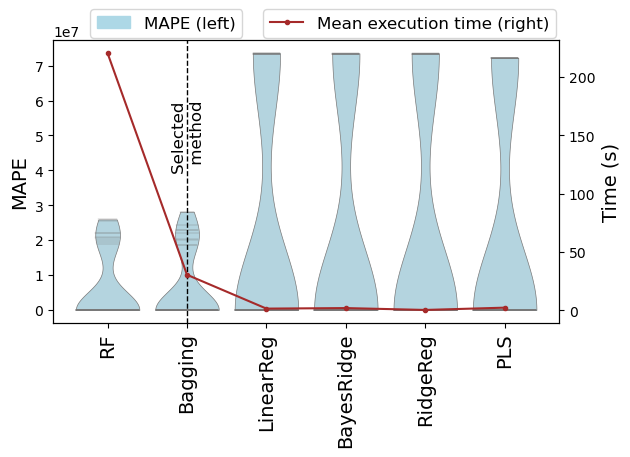

In [110]:
# Y hacer una gráfica chingona
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="value", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='MAPE (left)')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Mean execution time (right)')
plt.ylabel('Time (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

In [111]:
# Ya que sabemos que el Bagging es mejor
model = BaggingRegressor(n_jobs = 8)
model.fit(x_train, y_train)

c:\Users\user\miniconda3\envs\ds\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(n_jobs=8)

In [112]:
y_pred_na = model.predict(x_na)
y_pred_na

array([0.10283202, 0.12788993, 0.23994137, ..., 0.09077585, 0.11547917,
       0.11299702])

In [113]:
# Se reintegra en el conjunto de datos
df_na.value = y_pred_na
df_inter = df_scaled.copy()
df_inter.loc[df_na.index, 'value'] = df_na.value

descaled = scaler.inverse_transform(df_inter)
df_descaled = pd.DataFrame(descaled, columns = df_inter.columns, index = df_inter.index)

variable_col = df_descaled.iloc[:, 5:].idxmax(axis=1)

df_final = pd.concat([df_descaled, variable_col], axis = 1).drop(columns = ['BP','CO','NO','NO2','NOX','O3','PM10','PM2_5','RF','RH','SO2','SR','T','WD','WV'])
df_final.columns = ['timestamp', 'lat', 'lon', 'h', 'value', 'variable']
df_final.timestamp = df.timestamp
df_final['original'] = np.nan
df_final.loc[df_dropna.index, 'original'] = df_final.loc[df_dropna.index, 'value']
df_final['interpolated'] = np.nan
df_final.loc[df_na.index, 'interpolated'] = df_final.loc[df_na.index, 'value']

C:\Users\user\AppData\Local\Temp\ipykernel_22404\1206900166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na.value = y_pred_na


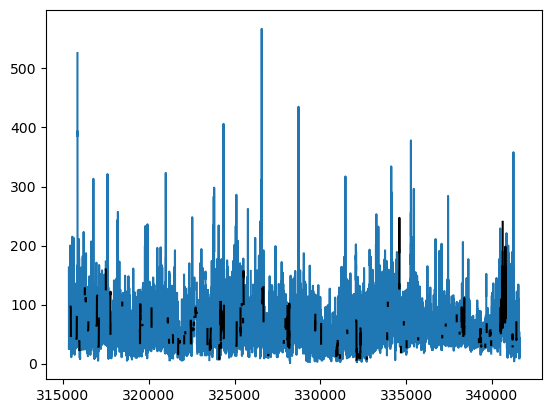

In [114]:
t = df_final[(df_final.variable == 'PM10') & (df_final.lat == 25.665)]
plt.figure()
plt.plot(t.original)
plt.plot(t.interpolated, c = 'black')
plt.show()

Con esto, ya tenemos una mejor predicción 🥳

## Tarea (10 puntos)

- Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo
- Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
- Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)
- Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

## Fuentes

- https://scikit-learn.org/stable/supervised_learning.html
- https://www.toptal.com/machine-learning/supervised-machine-learning-algorithms
- https://www.datacamp.com/blog/supervised-machine-learning